## Shared Micromobility Vehicle Trips Data Analysis
---

### Data Source and API
- AODP Dataset Access: https://data.austintexas.gov/Transportation-and-Mobility/Shared-Micromobility-Vehicle-Trips/7d8e-dm7r
- API Endpoint: https://data.austintexas.gov/resource/7d8e-dm7r.json
- API Documentation: https://dev.socrata.com/foundry/data.austintexas.gov/7d8e-dm7r

To access the dataset host, install SODA API first:
    `pip install sodapy`

### Data Extraction

- Data Provided
    - trip_id
    - device_id
    - modified_date
    - council_district_start
    - council_district_end
    - vehicle_type
    - trip_duration
    - trip_distance
    - start_time
    - end_time
    - month
    - hour
    - day_of_week
    - year
    - census_geoid_start
    - census_geoid_end

In [4]:
# Dependencies and packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import datetime as dt
import seaborn as sns
import pandas as pd
#import geopandas as gpd
from sodapy import Socrata

In [5]:
# url = https://data.austintexas.gov/resource/7d8e-dm7r.json
# Data Extraction:
client = Socrata("data.austintexas.gov", None)

results = client.get("7d8e-dm7r", limit=83000000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [5]:
results_df.head()

,trip_id,device_id,modified_date,council_district_start,council_district_end,vehicle_type,trip_duration,trip_distance,start_time,end_time,month,hour,day_of_week,year,census_geoid_start,census_geoid_end
0,6865731e-5e4b-4819-9435-4e62e09a652d,08c8c852-257c-49ad-a14f-727bfc79626d,2018-12-13T15:36:12.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08dc0d9c-735e-4006-b9af-60011509e469,255716b5-4a9f-4efc-9967-7a65b3521bac,2018-12-21T00:41:42.000,9,0,bicycle,11491603,1658,2018-11-30T11:00:00.000,2019-04-12T12:00:00.000,11,11,5,2018,NaN,NaN
2,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,2019-04-30T06:45:17.000,9,9,scooter,170,0,2019-04-29T17:30:00.000,2019-04-29T17:30:00.000,4,17,1,2019,48453000601,48453000601
3,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,2019-04-30T06:45:17.000,9,9,scooter,90,0,2019-04-29T17:30:00.000,2019-04-29T17:30:00.000,4,17,1,2019,48453000601,48453000601
4,1d4f5d89-c044-46cb-8674-80d37fa0371f,caa0325c-7c0b-4909-a573-d83126ecc953,2019-04-30T06:45:17.000,9,9,scooter,570,826,2019-04-29T17:15:00.000,2019-04-29T17:15:00.000,4,17,1,2019,48453001100,48453001100


In [20]:
results_df['year'].value_counts()

2019    6023690
2018    2305093
2020      84071
Name: year, dtype: int64

In [6]:
# Check for missing values:
results_df.count()

trip_id                   8404531
device_id                 8404531
modified_date             8404531
council_district_start    8404397
council_district_end      8404397
vehicle_type              8404530
trip_duration             8404530
trip_distance             8404530
start_time                8404530
end_time                  8404530
month                     8404530
hour                      8404530
day_of_week               8404530
year                      8404530
census_geoid_start        8404395
census_geoid_end          8404395
dtype: int64

In [10]:
# Checking and confirming the missing values:
missing_census_geoid_start = results_df["census_geoid_start"].isnull().sum()
print(f"There are {missing_census_geoid_start} missing census_geoid_start.")

There are 136 missing census_geoid_start.


In [11]:
results_df.isnull().sum()

trip_id                     0
device_id                   0
modified_date               0
council_district_start    134
council_district_end      134
vehicle_type                1
trip_duration               1
trip_distance               1
start_time                  1
end_time                    1
month                       1
hour                        1
day_of_week                 1
year                        1
census_geoid_start        136
census_geoid_end          136
dtype: int64

### Data Cleaning

In [6]:
clean_df = results_df.copy()

In [7]:
clean_df.columns = clean_df.columns.str.replace('_',' ').str.title()
clean_df

,Census Geoid End,Census Geoid Start,Council District End,Council District Start,Day Of Week,Device Id,End Time,Hour,Modified Date,Month,Start Time,Trip Distance,Trip Duration,Trip Id,Vehicle Type,Year
0,NaN,NaN,0,0,NaN,08c8c852-257c-49ad-a14f-727bfc79626d,NaN,NaN,2018-12-13T15:36:12.000,NaN,NaN,NaN,NaN,6865731e-5e4b-4819-9435-4e62e09a652d,NaN,NaN
1,NaN,NaN,0,9,5,255716b5-4a9f-4efc-9967-7a65b3521bac,2019-04-12T12:00:00.000,11,2018-12-21T00:41:42.000,11,2018-11-30T11:00:00.000,1658,11491603,08dc0d9c-735e-4006-b9af-60011509e469,bicycle,2018
2,48453001100,48453001100,9,1,6,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-27T15:15:00.000,15,2019-04-28T02:42:07.000,4,2019-04-27T15:00:00.000,2785,678,92b80c20-89a4-4c7f-8b61-81a3570a218e,scooter,2019
3,48453001901,48453001305,5,9,6,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-27T15:15:00.000,15,2019-04-28T02:42:07.000,4,2019-04-27T15:00:00.000,2466,713,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,scooter,2019
4,48453001305,48453001100,9,9,6,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-27T15:15:00.000,15,2019-04-28T02:42:07.000,4,2019-04-27T15:15:00.000,1608,469,baec3b6e-66f1-4043-bbd5-d54087f1c2de,scooter,2019
5,48453001100,48453001305,9,9,6,672b17a6-6916-4f4e-a4e4-8168d623f638,2019-04-27T15:15:00.000,15,2019-04-28T02:42:07.000,4,2019-04-27T15:15:00.000,1326,644,23787175-efa2-46db-9ba6-9d53f9eabd64,scooter,2019
6,48453000804,48453000902,1,3,6,10e6b006-c5c5-4012-8f73-1ece7b7d19c1,2019-04-27T15:15:00.000,15,2019-04-28T02:42:07.000,4,2019-04-27T15:15:00.000,1511,419,8353d103-166b-4958-aa7d-07c59cc8ef5c,scooter,2019
7,48453001100,48453001200,9,9,6,1ce0a7ba-b44c-4e37-9b8e-b92254f4de13,2019-04-27T15:15:00.000,15,2019-04-28T02:42:07.000,4,2019-04-27T15:15:00.000,973,307,836370f2-60f0-47bf-a0fb-b26568e2745a,scooter,2019
8,48453000902,48453000902,3,3,6,338ed9f0-1b70-4f6b-927e-c61a051e0165,2019-04-27T15:15:00.000,15,2019-04-28T02:42:07.000,4,2019-04-27T15:15:00.000,3,48,7cdaeefc-e667-4294-8e21-4fb5ec6879c2,scooter,2019
9,48453001100,48453001100,9,9,6,10de4d7b-5e1e-48b5-887a-e88bf4761f99,2019-04-27T15:15:00.000,15,2019-04-28T02:42:07.000,4,2019-04-27T15:15:00.000,526,128,6c32a1c0-b734-4fe8-934c-7eaef3e85791,scooter,2019


In [9]:
# Renaming some column names:
clean_df = clean_df.rename(columns = {
    "Trip Id": "Trip ID",
    "Device Id": "Device ID",
    "Census Geoid Start": "Census GEOID Start",
    "Census Geoid End": "Census GEOID End",
})
clean_df.head()

,Census GEOID End,Census GEOID Start,Council District End,Council District Start,Day Of Week,Device ID,End Time,Hour,Modified Date,Month,Start Time,Trip Distance,Trip Duration,Trip ID,Vehicle Type,Year
0,NaN,NaN,0,0,NaN,08c8c852-257c-49ad-a14f-727bfc79626d,NaN,NaN,2018-12-13T15:36:12.000,NaN,NaN,NaN,NaN,6865731e-5e4b-4819-9435-4e62e09a652d,NaN,NaN
1,NaN,NaN,0,9,5,255716b5-4a9f-4efc-9967-7a65b3521bac,2019-04-12T12:00:00.000,11,2018-12-21T00:41:42.000,11,2018-11-30T11:00:00.000,1658,11491603,08dc0d9c-735e-4006-b9af-60011509e469,bicycle,2018
2,48453001100,48453001100,9,1,6,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-27T15:15:00.000,15,2019-04-28T02:42:07.000,4,2019-04-27T15:00:00.000,2785,678,92b80c20-89a4-4c7f-8b61-81a3570a218e,scooter,2019
3,48453001901,48453001305,5,9,6,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-27T15:15:00.000,15,2019-04-28T02:42:07.000,4,2019-04-27T15:00:00.000,2466,713,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,scooter,2019
4,48453001305,48453001100,9,9,6,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-27T15:15:00.000,15,2019-04-28T02:42:07.000,4,2019-04-27T15:15:00.000,1608,469,baec3b6e-66f1-4043-bbd5-d54087f1c2de,scooter,2019


In [10]:
# Drop all the null values
clean_df = clean_df.dropna(how='any')
clean_df.head()

,Census GEOID End,Census GEOID Start,Council District End,Council District Start,Day Of Week,Device ID,End Time,Hour,Modified Date,Month,Start Time,Trip Distance,Trip Duration,Trip ID,Vehicle Type,Year
2,48453001100,48453001100,9,1,6,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-27T15:15:00.000,15,2019-04-28T02:42:07.000,4,2019-04-27T15:00:00.000,2785,678,92b80c20-89a4-4c7f-8b61-81a3570a218e,scooter,2019
3,48453001901,48453001305,5,9,6,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-27T15:15:00.000,15,2019-04-28T02:42:07.000,4,2019-04-27T15:00:00.000,2466,713,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,scooter,2019
4,48453001305,48453001100,9,9,6,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-27T15:15:00.000,15,2019-04-28T02:42:07.000,4,2019-04-27T15:15:00.000,1608,469,baec3b6e-66f1-4043-bbd5-d54087f1c2de,scooter,2019
5,48453001100,48453001305,9,9,6,672b17a6-6916-4f4e-a4e4-8168d623f638,2019-04-27T15:15:00.000,15,2019-04-28T02:42:07.000,4,2019-04-27T15:15:00.000,1326,644,23787175-efa2-46db-9ba6-9d53f9eabd64,scooter,2019
6,48453000804,48453000902,1,3,6,10e6b006-c5c5-4012-8f73-1ece7b7d19c1,2019-04-27T15:15:00.000,15,2019-04-28T02:42:07.000,4,2019-04-27T15:15:00.000,1511,419,8353d103-166b-4958-aa7d-07c59cc8ef5c,scooter,2019


In [11]:
# Change the time and date format for columns - 'Modified Date', 'Start time' and 'End Time'
clean_df['Start Time'] = pd.to_datetime(clean_df['Start Time'])
clean_df['End Time'] = pd.to_datetime(clean_df['End Time'])
clean_df['Modified Date'] = pd.to_datetime(clean_df['Modified Date'])
clean_df.head()

,Census GEOID End,Census GEOID Start,Council District End,Council District Start,Day Of Week,Device ID,End Time,Hour,Modified Date,Month,Start Time,Trip Distance,Trip Duration,Trip ID,Vehicle Type,Year
2,48453001100,48453001100,9,1,6,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:00:00,2785,678,92b80c20-89a4-4c7f-8b61-81a3570a218e,scooter,2019
3,48453001901,48453001305,5,9,6,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:00:00,2466,713,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,scooter,2019
4,48453001305,48453001100,9,9,6,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:15:00,1608,469,baec3b6e-66f1-4043-bbd5-d54087f1c2de,scooter,2019
5,48453001100,48453001305,9,9,6,672b17a6-6916-4f4e-a4e4-8168d623f638,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:15:00,1326,644,23787175-efa2-46db-9ba6-9d53f9eabd64,scooter,2019
6,48453000804,48453000902,1,3,6,10e6b006-c5c5-4012-8f73-1ece7b7d19c1,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:15:00,1511,419,8353d103-166b-4958-aa7d-07c59cc8ef5c,scooter,2019


In [19]:
#Find the total number of scooter rides:
scooters = clean_df[clean_df["Vehicle Type"] == "scooter"]
total_scooters = len(clean_df) - scooters.shape[0]
total_scooters

420536

In [20]:
#Find the total number of bicycle rides:
bicycles = clean_df[clean_df["Vehicle Type"] == "bicycle"]
total_bicycles = len(clean_df) - bicycles.shape[0]
total_bicycles

7983859

In [21]:
#Check to tally the total rides 
total_rides = total_bicycles + total_scooters
total_rides

8404395

In [22]:
# Find the number of unique devices
device_id_list =  clean_df["Device ID"].value_counts()
device_id_list

49b0ba01-7c8b-4504-b8b0-ff3380ffce83    848
4478fe94-894f-4c4f-a1ab-a67a70739be5    841
27fda021-2d10-4fd7-a9ba-94a50b3a0fff    828
6cb1120f-282a-4894-89e7-395a13b1f1d0    823
d513ff4d-9b47-4422-bf3a-f686b500e1cd    788
                                       ... 
6441b034-3ab0-4864-88c9-8310c099fe1f      1
4820adf3-c085-4997-8a00-1e32f70fa16a      1
4636bade-724e-46a9-9627-a4cc8483a64f      1
6e1feaff-ad8a-41ef-96fe-74ad946eaaaf      1
c66315bc-f296-4d59-bcea-44d66e518433      1
Name: Device ID, Length: 71901, dtype: int64

In [23]:
# Find the number of unique GEOIDs where the trips started
start_geoid = clean_df["Census GEOID Start"].value_counts()
start_geoid

48453001100    3241538
48453000601     750238
48453000603     602171
48453000604     515279
48453001305     511063
                ...   
48491020509          1
48491020203          1
48491021503          1
48491020310          1
48021950502          1
Name: Census GEOID Start, Length: 283, dtype: int64

In [24]:
# Find the number of unique GEOIDs where the trips ended
end_geoid = clean_df["Census GEOID End"].value_counts()
end_geoid

48453001100    3136884
48453000601     824385
48453000603     542467
48453001305     510588
48453000902     460673
                ...   
48209010808          1
48491020317          1
48491020327          1
48491020310          1
48021950502          1
Name: Census GEOID End, Length: 272, dtype: int64

In [25]:
# Convert dataframe to CSV 
output_data_file = "/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/shared_mobility_data.csv"
clean_df.to_csv(output_data_file)

### Data Merging

In [12]:
#csvpath1 = os.path.join("/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/tract_to_zip.csv")
#csvpath2 = os.path.join("/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/shared_mobility_data.csv")
#zip_data_start = pd.read_csv(csvpath1)
#zip_data_end = pd.read_csv(csvpath1)
#clean_df = pd.read_csv(csvpath2, low_memory=False)

FileNotFoundError: [Errno 2] File b'/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/tract_to_zip.csv' does not exist: b'/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/tract_to_zip.csv'

In [5]:
clean_df.head(10)

,Unnamed: 0,Trip ID,Device ID,Modified Date,Council District Start,Council District End,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day Of Week,Year,Census GEOID Start,Census GEOID End
0,2,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,2019-04-30 06:45:17,9,9,scooter,170,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601
1,3,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,2019-04-30 06:45:17,9,9,scooter,90,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601
2,4,1d4f5d89-c044-46cb-8674-80d37fa0371f,caa0325c-7c0b-4909-a573-d83126ecc953,2019-04-30 06:45:17,9,9,scooter,570,826,2019-04-29 17:15:00,2019-04-29 17:15:00,4,17,1,2019,48453001100,48453001100
3,5,cd442fb9-058f-46a7-af90-b4adb56fd163,1653cf10-75f5-4934-a9d9-c8d43ade67a9,2019-04-30 06:45:17,9,9,scooter,438,1815,2019-04-29 17:30:00,2019-04-29 17:45:00,4,17,1,2019,48453000601,48453000500
4,6,e1ac0e42-ab2d-4eac-b019-f085169c1d38,1d89f9e2-d01a-4736-b7d8-258cb9a2108c,2019-04-30 06:45:17,9,9,scooter,391,1519,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000401,48453000307
5,7,b7df9ed5-61ae-40ca-9b7e-0ffa1d092b79,09b2c7b8-6631-4999-85d5-4273b4c98f3a,2019-04-30 06:45:17,9,9,scooter,153,0,2019-04-29 17:00:00,2019-04-29 17:00:00,4,17,1,2019,48453000604,48453000604
6,8,1c8b3eab-6aed-4b69-8eca-6b5e0b70a45f,ab262134-2421-49b7-a97f-fadde23e71db,2019-04-30 06:45:17,9,9,scooter,570,1843,2019-04-29 17:30:00,2019-04-29 17:45:00,4,17,1,2019,48453001100,48453001100
7,9,f9174176-9d16-431d-af21-ebcab226da31,73e8b0bf-3aae-4f80-8683-c5d7c3b3989a,2019-04-30 06:45:17,9,9,scooter,668,2829,2019-04-29 17:15:00,2019-04-29 17:30:00,4,17,1,2019,48453000603,48453001200
8,10,1c2a190d-06d7-42fa-8d3d-336b01cf1e09,c4ce4cc9-daf2-4273-aae5-136b0afa1f55,2019-04-30 06:45:17,9,3,scooter,390,1283,2019-04-29 17:30:00,2019-04-29 17:45:00,4,17,1,2019,48453001100,48453002304
9,11,7211c488-c0ad-40a9-8a07-4326dbb56c6f,9e6ae0d2-76a0-4e24-8f6e-8d724564b638,2019-04-30 06:45:17,9,9,scooter,432,1698,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000603


In [6]:
clean_df = clean_df.drop(columns=['Unnamed: 0'])
clean_df

,Trip ID,Device ID,Modified Date,Council District Start,Council District End,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day Of Week,Year,Census GEOID Start,Census GEOID End
0,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,2019-04-30 06:45:17,9,9,scooter,170,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601
1,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,2019-04-30 06:45:17,9,9,scooter,90,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601
2,1d4f5d89-c044-46cb-8674-80d37fa0371f,caa0325c-7c0b-4909-a573-d83126ecc953,2019-04-30 06:45:17,9,9,scooter,570,826,2019-04-29 17:15:00,2019-04-29 17:15:00,4,17,1,2019,48453001100,48453001100
3,cd442fb9-058f-46a7-af90-b4adb56fd163,1653cf10-75f5-4934-a9d9-c8d43ade67a9,2019-04-30 06:45:17,9,9,scooter,438,1815,2019-04-29 17:30:00,2019-04-29 17:45:00,4,17,1,2019,48453000601,48453000500
4,e1ac0e42-ab2d-4eac-b019-f085169c1d38,1d89f9e2-d01a-4736-b7d8-258cb9a2108c,2019-04-30 06:45:17,9,9,scooter,391,1519,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000401,48453000307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8404390,4881260f-eb58-4ccc-83b0-27d7e6dbd9b7,5bf04f17-a5bc-4c70-bb73-19ffde81e67c,2020-01-09 17:30:09,9,9,scooter,195,20,2020-01-09 03:45:00,2020-01-09 03:45:00,1,3,4,2020,48453000603,48453000603
8404391,f211b58a-094a-4799-834a-0ad7ea384417,04ea74b3-971b-41b5-9d02-202ae4e7d416,2020-01-09 17:30:09,9,9,scooter,755,94,2020-01-09 03:15:00,2020-01-09 03:30:00,1,3,4,2020,48453001100,48453001100
8404392,52e332f3-b1fa-417f-bfaa-cf660e30cea9,28df919d-5d6d-42e2-af7f-8d9b3ee771a9,2020-01-09 17:30:09,9,9,scooter,135,25,2020-01-09 04:00:00,2020-01-09 04:00:00,1,4,4,2020,48453000603,48453000604
8404393,e5d899b1-2bc3-470c-a602-5445347e5e67,b73b5afd-64d0-438a-a962-90e1bf8b044f,2020-01-09 17:30:21,9,9,scooter,299,924,2020-01-09 07:15:00,2020-01-09 07:15:00,1,7,4,2020,48453001200,48453001100


In [7]:
#column3 = zip_data['tract']
#zip_data['Census GEOID End'] = column3
zip_data_start.rename(columns={'zip': 'Zipcode', 'tract': 'Census GEOID Start'}, inplace=True)
zip_data_start

,Zipcode,Census GEOID Start
0,501,36103158607
1,601,72113071700
2,601,72001956800
3,601,72001956300
4,601,72001956600
...,...,...
170188,99925,2198000200
170189,99926,2198940100
170190,99927,2198000100
170191,99928,2130000100


In [8]:
zip_data_end.rename(columns={'zip': 'Zipcode', 'tract': 'Census GEOID End'}, inplace=True)
zip_data_end

,Zipcode,Census GEOID End
0,501,36103158607
1,601,72113071700
2,601,72001956800
3,601,72001956300
4,601,72001956600
...,...,...
170188,99925,2198000200
170189,99926,2198940100
170190,99927,2198000100
170191,99928,2130000100


In [9]:
zip_data_start[["Zipcode", "Census GEOID Start"]] = zip_data_start[["Zipcode", "Census GEOID Start"]].astype(int).astype(str)
zip_data_end[["Zipcode", "Census GEOID End"]] = zip_data_end[["Zipcode", "Census GEOID End"]].astype(int).astype(str)


In [17]:
csvpath = os.path.join("tract_to_zip.csv")


zip_data = pd.read_csv(csvpath)
zip_data

             

zip_data[["zip", "GEOID End"]] = zip_data[["zip", "GEOID End"]].astype(str)



df_end = pd.merge(clean_df, zip_data, left_on="Census GEOID End", right_on="GEOID End")
df_end

,Census GEOID End,Census GEOID Start,Council District End,Council District Start,Day Of Week,Device ID,End Time,Hour,Modified Date,Month,Start Time,Trip Distance,Trip Duration,Trip ID,Vehicle Type,Year,zip,GEOID End,population
0,48453001100,48453001100,9,1,6,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:00:00,2785,678,92b80c20-89a4-4c7f-8b61-81a3570a218e,scooter,2019,78701,48453001100,6608
1,48453001100,48453001305,9,9,6,672b17a6-6916-4f4e-a4e4-8168d623f638,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:15:00,1326,644,23787175-efa2-46db-9ba6-9d53f9eabd64,scooter,2019,78701,48453001100,6608
2,48453001100,48453001200,9,9,6,1ce0a7ba-b44c-4e37-9b8e-b92254f4de13,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:15:00,973,307,836370f2-60f0-47bf-a0fb-b26568e2745a,scooter,2019,78701,48453001100,6608
3,48453001100,48453001100,9,9,6,10de4d7b-5e1e-48b5-887a-e88bf4761f99,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:15:00,526,128,6c32a1c0-b734-4fe8-934c-7eaef3e85791,scooter,2019,78701,48453001100,6608
4,48453001100,48453001401,9,9,6,c0a5c680-c577-43c8-a536-887c571d06f4,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:00:00,1967,621,911faedf-58af-43de-923d-a2368d1270d2,scooter,2019,78701,48453001100,6608
5,48453001100,48453001100,9,1,6,7173d953-77d7-4bab-bfd1-21d9f297f75f,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:00:00,2663,675,9da91b53-3044-47e9-a302-447409d48dc5,scooter,2019,78701,48453001100,6608
6,48453001100,48453001100,9,9,6,fb650209-f28e-491c-9380-fb1da8b5a59e,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:00:00,1649,697,aabd8b2e-24f7-4b9d-b321-1a0580154bfc,scooter,2019,78701,48453001100,6608
7,48453001100,48453001401,9,9,6,4c30b970-b9a5-4608-8b3d-aa5c5cf56a0d,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:15:00,1528,505,9dd00be6-15a2-4667-8a58-107ad2e01a87,scooter,2019,78701,48453001100,6608
8,48453001100,48453001100,9,9,6,456a55a3-6a1f-4aa9-82bc-a645194695e7,2019-04-27 15:15:00,15,2019-04-28 02:42:12,4,2019-04-27 15:15:00,1675,687,4aedf815-2841-40af-aeda-3ee29a3d689d,scooter,2019,78701,48453001100,6608
9,48453001100,48453001100,9,9,6,c2603286-5544-4850-9903-f7299ab7729d,2019-04-27 15:15:00,15,2019-04-28 02:42:12,4,2019-04-27 15:15:00,321,234,fd18e6f6-6dc5-459b-bab5-b06f01f4c148,scooter,2019,78701,48453001100,6608


In [18]:
df_start = pd.merge(clean_df, zip_data, left_on="Census GEOID Start", right_on="GEOID End")
df_start

,Census GEOID End,Census GEOID Start,Council District End,Council District Start,Day Of Week,Device ID,End Time,Hour,Modified Date,Month,Start Time,Trip Distance,Trip Duration,Trip ID,Vehicle Type,Year,zip,GEOID End,population
0,48453001100,48453001100,9,1,6,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:00:00,2785,678,92b80c20-89a4-4c7f-8b61-81a3570a218e,scooter,2019,78701,48453001100,6608
1,48453001305,48453001100,9,9,6,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:15:00,1608,469,baec3b6e-66f1-4043-bbd5-d54087f1c2de,scooter,2019,78701,48453001100,6608
2,48453001100,48453001100,9,9,6,10de4d7b-5e1e-48b5-887a-e88bf4761f99,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:15:00,526,128,6c32a1c0-b734-4fe8-934c-7eaef3e85791,scooter,2019,78701,48453001100,6608
3,48453001911,48453001100,8,9,6,7a1920bf-cf81-4db0-a304-417cd95f00ce,2019-04-27 15:15:00,14,2019-04-28 02:42:07,4,2019-04-27 14:30:00,7693,3135,58dcd3a9-d8e6-4882-b826-0bea96eaaa4a,scooter,2019,78701,48453001100,6608
4,48453001911,48453001100,8,9,6,94219cad-fed5-444e-8e2d-494c51ff32e2,2019-04-27 15:15:00,14,2019-04-28 02:42:07,4,2019-04-27 14:15:00,10645,4126,1ae02a25-d8f5-4b99-b3b8-813675385552,scooter,2019,78701,48453001100,6608
5,48453001100,48453001100,9,1,6,7173d953-77d7-4bab-bfd1-21d9f297f75f,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:00:00,2663,675,9da91b53-3044-47e9-a302-447409d48dc5,scooter,2019,78701,48453001100,6608
6,48453001100,48453001100,9,9,6,fb650209-f28e-491c-9380-fb1da8b5a59e,2019-04-27 15:15:00,15,2019-04-28 02:42:07,4,2019-04-27 15:00:00,1649,697,aabd8b2e-24f7-4b9d-b321-1a0580154bfc,scooter,2019,78701,48453001100,6608
7,48453001100,48453001100,9,9,6,456a55a3-6a1f-4aa9-82bc-a645194695e7,2019-04-27 15:15:00,15,2019-04-28 02:42:12,4,2019-04-27 15:15:00,1675,687,4aedf815-2841-40af-aeda-3ee29a3d689d,scooter,2019,78701,48453001100,6608
8,48453001100,48453001100,9,9,6,c2603286-5544-4850-9903-f7299ab7729d,2019-04-27 15:15:00,15,2019-04-28 02:42:12,4,2019-04-27 15:15:00,321,234,fd18e6f6-6dc5-459b-bab5-b06f01f4c148,scooter,2019,78701,48453001100,6608
9,48453000700,48453001100,9,9,6,bc57b45a-a960-430c-b95c-aeab27146fba,2019-04-27 15:15:00,15,2019-04-28 02:42:12,4,2019-04-27 15:00:00,3265,810,c93fec6e-1816-4010-8331-e25f1917add2,scooter,2019,78701,48453001100,6608


In [11]:
df_start = df_start.rename(columns={'Zipcode': 'Zipcode Start'})

In [12]:
df_start = df_start.dropna()

In [34]:
df_start.dtypes

Trip ID                    object
Device ID                  object
Modified Date              object
Council District Start    float64
Council District End      float64
Vehicle Type               object
Trip Duration             float64
Trip Distance             float64
Start Time                 object
End Time                   object
Month                     float64
Hour                      float64
Day Of Week               float64
Year                      float64
Census GEOID Start         object
Census GEOID End           object
Zipcode Start              object
dtype: object

In [35]:
zip_data_start.dtypes

Zipcode               object
Census GEOID Start    object
dtype: object

In [29]:
vehicle_type = df_end['Vehicle Type'].nunique

In [14]:
df_end = df_end.rename(columns={'Zipcode': 'Zipcode End'})

In [15]:
df_end = df_end.dropna()
df_end

,Trip ID,Device ID,Modified Date,Council District Start,Council District End,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day Of Week,Year,Census GEOID Start,Census GEOID End,Zipcode Start,Zipcode End
0,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,2019-04-30 06:45:17,9.0,9.0,scooter,170.0,0.0,2019-04-29 17:30:00,2019-04-29 17:30:00,4.0,17.0,1.0,2019.0,48453000601,48453000601,78705,78705
1,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,2019-04-30 06:45:17,9.0,9.0,scooter,90.0,0.0,2019-04-29 17:30:00,2019-04-29 17:30:00,4.0,17.0,1.0,2019.0,48453000601,48453000601,78705,78705
2,63bbe554-d468-4c76-9101-eb8a6731525c,c3d2f2c5-3762-41f4-b5e6-71d5b714f731,2019-04-30 06:45:17,9.0,9.0,scooter,477.0,1144.0,2019-04-29 17:45:00,2019-04-29 17:45:00,4.0,17.0,1.0,2019.0,48453000601,48453000601,78705,78705
3,d705a126-24bd-4054-bda0-817e58f89e74,5aaf53be-efc0-46ec-84c6-34b832d1af29,2019-04-30 06:45:17,9.0,9.0,scooter,49.0,52.0,2019-04-29 17:15:00,2019-04-29 17:15:00,4.0,17.0,1.0,2019.0,48453000601,48453000601,78705,78705
4,b61c99a9-4d60-4a36-8b83-db24569732f8,cbbe89a3-69d2-4d37-a779-f1f22e8cd526,2019-04-30 06:45:17,9.0,9.0,scooter,317.0,1115.0,2019-04-29 17:15:00,2019-04-29 17:15:00,4.0,17.0,1.0,2019.0,48453000601,48453000601,78705,78705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76452800,1917034f-7981-405f-8568-ac0c28eec82a,687da1df-9884-48bf-97fd-252846821155,2019-04-17 16:48:20,0.0,0.0,scooter,1022.0,2397.0,2019-02-22 04:00:00,2019-02-22 04:15:00,2.0,4.0,5.0,2019.0,48209010809,48209010809,78738,78737
76452801,1917034f-7981-405f-8568-ac0c28eec82a,687da1df-9884-48bf-97fd-252846821155,2019-04-17 16:48:20,0.0,0.0,scooter,1022.0,2397.0,2019-02-22 04:00:00,2019-02-22 04:15:00,2.0,4.0,5.0,2019.0,48209010809,48209010809,78620,78738
76452802,1917034f-7981-405f-8568-ac0c28eec82a,687da1df-9884-48bf-97fd-252846821155,2019-04-17 16:48:20,0.0,0.0,scooter,1022.0,2397.0,2019-02-22 04:00:00,2019-02-22 04:15:00,2.0,4.0,5.0,2019.0,48209010809,48209010809,78736,78738
76452803,1917034f-7981-405f-8568-ac0c28eec82a,687da1df-9884-48bf-97fd-252846821155,2019-04-17 16:48:20,0.0,0.0,scooter,1022.0,2397.0,2019-02-22 04:00:00,2019-02-22 04:15:00,2.0,4.0,5.0,2019.0,48209010809,48209010809,78737,78738


In [16]:
df = df_end.copy()

In [17]:
df.isnull().sum()

Trip ID                   0
Device ID                 0
Modified Date             0
Council District Start    0
Council District End      0
Vehicle Type              0
Trip Duration             0
Trip Distance             0
Start Time                0
End Time                  0
Month                     0
Hour                      0
Day Of Week               0
Year                      0
Census GEOID Start        0
Census GEOID End          0
Zipcode Start             0
Zipcode End               0
dtype: int64

In [38]:
#Commenting this out because we already have the csv file after running this once
#output_data_file = "/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/merged_sharedmobility.csv"
#df.to_csv(output_data_file)

In [8]:
# csvpath = os.path.join("/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/merged_sharedmobility.csv")
# df = pd.read_csv(csvpath, index_col=0, low_memory=False)

/Users/sheetalbongale/.local/share/virtualenvs/Python-Practice-Codes-ComU94dP/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [18]:
df.head(30)

,Trip ID,Device ID,Modified Date,Council District Start,Council District End,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day Of Week,Year,Census GEOID Start,Census GEOID End,Zipcode Start,Zipcode End
0,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,2019-04-30 06:45:17,9.0,9.0,scooter,170.0,0.0,2019-04-29 17:30:00,2019-04-29 17:30:00,4.0,17.0,1.0,2019.0,48453000601,48453000601,78705,78705
1,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,2019-04-30 06:45:17,9.0,9.0,scooter,90.0,0.0,2019-04-29 17:30:00,2019-04-29 17:30:00,4.0,17.0,1.0,2019.0,48453000601,48453000601,78705,78705
2,63bbe554-d468-4c76-9101-eb8a6731525c,c3d2f2c5-3762-41f4-b5e6-71d5b714f731,2019-04-30 06:45:17,9.0,9.0,scooter,477.0,1144.0,2019-04-29 17:45:00,2019-04-29 17:45:00,4.0,17.0,1.0,2019.0,48453000601,48453000601,78705,78705
3,d705a126-24bd-4054-bda0-817e58f89e74,5aaf53be-efc0-46ec-84c6-34b832d1af29,2019-04-30 06:45:17,9.0,9.0,scooter,49.0,52.0,2019-04-29 17:15:00,2019-04-29 17:15:00,4.0,17.0,1.0,2019.0,48453000601,48453000601,78705,78705
4,b61c99a9-4d60-4a36-8b83-db24569732f8,cbbe89a3-69d2-4d37-a779-f1f22e8cd526,2019-04-30 06:45:17,9.0,9.0,scooter,317.0,1115.0,2019-04-29 17:15:00,2019-04-29 17:15:00,4.0,17.0,1.0,2019.0,48453000601,48453000601,78705,78705
5,fc697b79-a623-440b-a6db-e6cc16695cd0,f0de7b2f-65eb-4790-8f10-765076e31380,2019-04-30 06:45:17,9.0,9.0,scooter,165.0,0.0,2019-04-29 17:30:00,2019-04-29 17:30:00,4.0,17.0,1.0,2019.0,48453000601,48453000601,78705,78705
6,3da4a17e-9c95-48c6-9338-672cc37be448,ce53cddb-5058-4840-82ae-824f95e8b55a,2019-04-30 06:45:17,9.0,9.0,scooter,180.0,521.0,2019-04-29 17:45:00,2019-04-29 17:45:00,4.0,17.0,1.0,2019.0,48453000601,48453000601,78705,78705
7,9aee1709-4057-4a6e-91ae-71e759db1fec,015f0688-9f37-4a14-85f9-324151883807,2019-04-30 06:45:17,9.0,9.0,scooter,145.0,423.0,2019-04-29 18:00:00,2019-04-29 18:00:00,4.0,18.0,1.0,2019.0,48453000601,48453000601,78705,78705
8,b6ebf3ea-45ce-4b3f-af70-ce3ba14ef11b,b57c9d20-49a3-4412-8393-fa89da489e99,2019-04-30 06:45:17,9.0,9.0,scooter,305.0,1174.0,2019-04-29 17:30:00,2019-04-29 17:30:00,4.0,17.0,1.0,2019.0,48453000601,48453000601,78705,78705
9,e522e234-325a-43f5-bc4f-7f10445a5fd8,789555b6-96a0-42cc-a775-7ff2b9675e89,2019-04-30 06:45:17,9.0,9.0,scooter,256.0,725.0,2019-04-29 17:15:00,2019-04-29 17:15:00,4.0,17.0,1.0,2019.0,48453000601,48453000601,78705,78705


### Visualization of the Clean Data Set

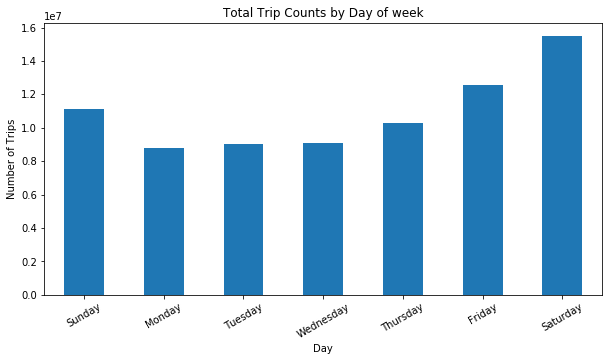

In [39]:
# Count trips per day and sort by day:
daily_total = pd.DataFrame(df['Day Of Week'].value_counts().sort_index())

# Map day of week with actual names:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_total['Day'] = days

# Plot glyph: 
daily_total.plot(kind='bar', x='Day', y='Day Of Week', title='Total Trip Counts by Day of week', figsize = (10,5), rot= 30, legend=False)
plt.ylabel("Number of Trips")
plt.savefig("Plots/trips_per_week.png")
plt.show()

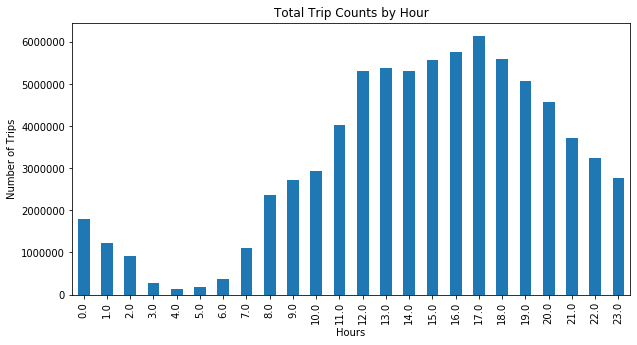

In [40]:
# Count trips per hour and sort by hour:
hourly_total = pd.DataFrame(df['Hour'].value_counts().sort_index())
#hours = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20','21','22','23']
#hours = ['0','1','10','11','12','13','14','15','16','17','18','19','2','20','21','22','23','3','4','5','6','7','8','9']
#hourly_total['Hours'] = hours

hourly_total.reset_index().plot(kind='bar', x='index', y='Hour', title='Total Trip Counts by Hour', figsize = (10,5), legend=False)
plt.xlabel('Hours')
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_hour.png")
plt.show()
#now shows correct plot with sorted xticks

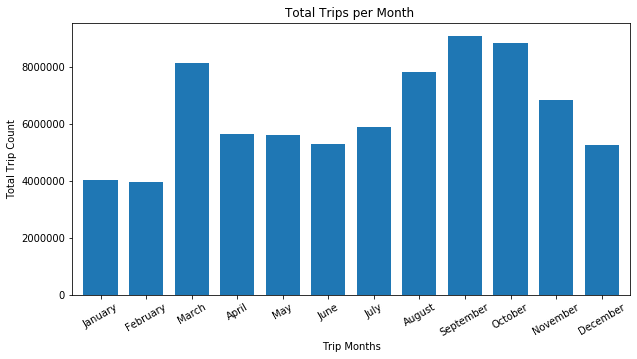

In [41]:
monthly_total = pd.DataFrame(df['Month'].value_counts()).sort_index()
import calendar
mn=[calendar.month_name[int(x)] for x in monthly_total.index.values.tolist()]

monthly_chart = monthly_total.plot.bar(title = "Total Trips per Month ",width = 0.75,figsize = (10,5),rot = 30, legend = False)
monthly_chart.set_xticklabels(mn)
monthly_chart.set_xlabel("Trip Months")
monthly_chart.set_ylabel("Total Trip Count")
plt.savefig("Plots/trips_per_month1.png")
plt.show()
#now shows correct plot with sorted months

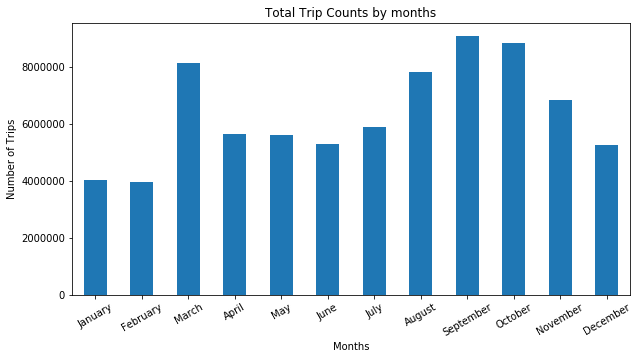

In [44]:
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_total['Months'] = month_list
monthly_total.reset_index().plot(kind='bar', x='Months', y='Month', title='Total Trip Counts by months', figsize = (10,5), rot = 30, legend=False)
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_month2.png")
plt.show()
#now shows correct plot with sorted xticks

In [24]:
x = results_df['year'].nunique()

x

3

In [ ]:
# Count how many trips started in each census GEOID tract
census_trip_start = pd.DataFrame(df['Census GEOID Start'].value_counts())

# Count how many trips ended in each census tract
census_trip_end = pd.DataFrame(df['Census GEOID End'].value_counts())

plt.bar(df["Census GEOID Start"], census_trip_start, figsize = (10,5))
plt.title("Total Count of trips starting per Census Tract")
plt.xlabel("GEOID ID")
plt.ylabel("Total Trips")
plt.show()

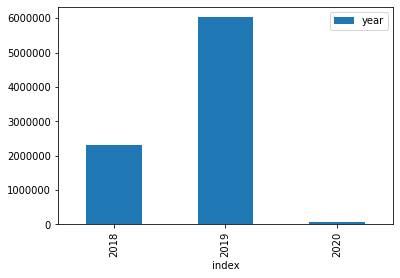

In [28]:
years = results_df['year'].value_counts().sort_index()

years.reset_index().plot(kind='bar', x='index', y='year')

plt.show()